In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras as K
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Перевіряємо версію TensorFlow
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [126]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [348]:
# from tensorflow.keras.datasets import mnist
from keras.datasets import mnist

# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: Навчальні зображення. Це тензори, що містять рукописні зображення цифр
# y_train: Навчальні мітки. Це масив, що містить відповідні мітки для навчальних зображень
# x_test: Тестові зображення. Це тензори, що містять рукописні зображення цифр, 
# які використовуються для тестування моделі
# y_test: Тестові мітки. Це масив, що містить відповідні мітки для тестових зображень

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворення міток у one-hot вектори
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

# Перетворення y_train на one-hot вектори
y_train_one_hot = tf.one_hot(y_train, depth=num_classes)
print(y_train_one_hot.shape)

#y_train_one_hot = to_categorical(y_train, 10)
#y_test_one_hot = to_categorical(y_test, 10)

print(x_train.shape)
# x_train   # x_train: Навчальні зображення. Це тензори, що містять рукописні зображення цифр
# Кожне значення матриці x_train відповідає інтенсивності пікселя, де значення 0 відповідає чорному колірі, 
# а значення 255 відповідає білому коліру

(60000, 10)
(60000, 28, 28)


In [349]:
# Впевнемося наочно, що наш датасет має не тільки нульові зображення
# Знаходимо індекси ненульових елементів
nonzero_indices = np.nonzero(x_train)

# Виводимо індекси ненульових елементів
print(nonzero_indices)
print(x_train.shape)

(array([    0,     0,     0, ..., 59999, 59999, 59999], dtype=int64), array([ 5,  5,  5, ..., 24, 24, 24], dtype=int64), array([12, 13, 14, ...,  8,  9, 10], dtype=int64))
(60000, 28, 28)


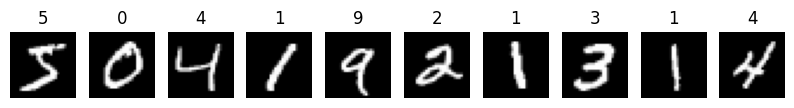

In [288]:
# Відображення перших 10 зображень з x_train та їх міток y_train
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))  # Додавання мітки
    #plt.title(str(tf.argmax(y_train[i]).numpy()))
    plt.title(str(y_train[i]))  # Відображення мітки без tf.argmax
    plt.axis('off')
plt.show()

In [350]:
print(y_train.shape)
y_train   # y_train: Навчальні мітки. Це масив, що містить відповідні мітки для навчальних зображень

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [351]:
print(x_test.shape)
x_test   # x_test: Тестові зображення. Це тензори, що містять рукописні зображення цифр, 
# які використовуються для тестування моделі

(10000, 28, 28)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

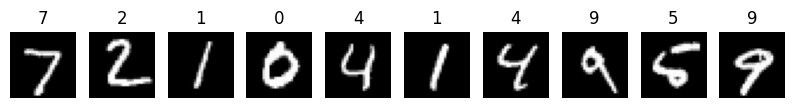

In [144]:
# Відображення перших 10 зображень з x_test та їх міток y_test
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(str(tf.argmax(y_test[i]).numpy()))  # Додавання мітки
    plt.axis('off')
plt.show()

In [145]:
print(y_test.shape)
y_test   # y_test: Тестові мітки. Це масив, що містить відповідні мітки для тестових зображень

(10000, 10)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [352]:
# Перетворюємо цілочисельні пікселі на тип float32
# x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

print(f"x_train.shape[0] = {x_train.shape[0]}")   # кількість зразків у навчальному датасеті.
print(f"x_train.shape[1] = {x_train.shape[1]}")   # ширина кожного зображення (кількість пікселів у рядку).
print(f"x_train.shape[2] = {x_train.shape[2]}")   # висота кожного зображення (кількість пікселів у стовпчику).

x_train.shape[0] = 60000
x_train.shape[1] = 28
x_train.shape[2] = 28


In [353]:
# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
print(f"x_train(modif).shape = {x_train.shape}")
print(f"x_test(modif).shape = {x_test.shape}")

x_train(modif).shape = (60000, 784)
x_test(modif).shape = (10000, 784)


In [354]:
# Отже, вхідна кількість ознак у ваших даних MNIST дорівнює 784:
# Визначення кількості вхідних ознак
input_feature_count = x_train.shape[1]
print("Вхідна кількість ознак:", input_feature_count)
num_classes = 10
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

Вхідна кількість ознак: 784


In [372]:
# Створимо нейронну мережу
# Ініціалізуємо класс DenseLayer, який успадковується від tf.Module - базовий клас для всіх модулів у TensorFlow
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        # in_features - Кількість вхідних нейронів або розмірність вхідного вектора
        # out_features: -  Кількість вихідних нейронів або розмірність вихідного вектора
        # name=None - Необов'язковий аргумент для імені модуля, корисний для організації та налагодження
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        # self.w - Це змінна TensorFlow (tf.Variable), яка представляє ваги між вхідним і вихідним шаром
        # Ініціалізується випадковими значеннями з нормального розподілу з розміром [in_features, out_features].
        self.b = tf.Variable(tf.zeros([out_features]), name="b")
        # self.b - Це змінна TensorFlow (tf.Variable), яка представляє зсуви (biases) для вихідного шару
        # Ініціалізується нулями з розміром [out_features]
    # Виклик шару
    def __call__(self, x, activation=None):
        # __call__ - Це метод, який дозволяє використовувати екземпляр класу як функцію
        # x - Вхідний тензор або дані, які передаються через шар
        # activation=0 - Необов'язковий аргумент для вибору функції активації. За замовчуванням встановлений у 0.
        #y = tf.matmul(x, self.w) + self.b
        x = tf.matmul(x, self.w) + self.b
        if activation:
            x = activation(x)
        return x
        # y = tf.matmul(x, self.w) + self.b - Обчислення зваженої суми вхідних значень і додавання зсувів
        # tf.matmul виконує матричне множення між вхідними даними x і вагами self.w
        #if activation != 0:
        #    return tf.nn.softmax(y)
        # softmax: Використовується переважно на вихідному шарі класифікаторів для нормалізації вихідних значень у ймовірності, 
        # які сумуються до 1.
        #else:
        #    return tf.nn.sigmoid(y)
        # sigmoid: Використовується для додавання нелінійності. Приводить значення до діапазону (0, 1).

class NN(tf.Module):
    # Клас NN є реалізацією простої нейронної мережі з використанням TensorFlow. 
    # Цей клас складається з трьох щільних (або повнозв'язних) шарів, які визначені в окремому класі DenseLayer
    #def __init__(self, name=None):
    def __init__(self, input_feature_count, num_classes, name=None):
        super().__init__(name=name)
        self.layer1 = DenseLayer(in_features=input_feature_count, out_features=128, name="layer1")
        self.layer2 = DenseLayer(in_features=128, out_features=256, name="layer2")
        self.output_layer = DenseLayer(in_features=256, out_features=num_classes, name="output_layer") 
        # Вихідний щільний шар з 256 входами і num_classes виходами (кількість класів для класифікації).

    def __call__(self, x, training=False):
        x = self.layer1(x, activation=tf.nn.sigmoid)
        x = self.layer2(x, activation=tf.nn.sigmoid)
        x = self.output_layer(x, activation=tf.nn.softmax)
        return x


In [473]:
from tensorflow.keras.utils import to_categorical
# Імпортується функція to_categorical з tensorflow.keras.utils, яка зазвичай використовується для перетворення міток у формат "one hot"
# В якості функції помилки в даному випадку зручно взяти крос-ентропію
# Функція крос-ентропії
def cross_entropy(y_pred, y_true):
    y_true = tf.cast(y_true, dtype=tf.float32)  # Кастуємо до float32
    loss2 = tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=True)
    return tf.reduce_mean(loss2)

    #return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))
    # tf.reduce_mean обчислює середнє значення цієї суми по всіх прикладах у батчі
    # tf.reduce_sum сумує значення по кожному класу

# Як метрику якості використовуємо точність
# Функція обчислення точності
# Функція обчислення точності
def accuracy(y_pred, y_true):
    y_pred_class = tf.argmax(y_pred, axis=1, output_type=tf.int64)
    y_true_class = tf.argmax(y_true, axis=1, output_type=tf.int64)

    correct_predictions = tf.equal(y_pred_class, y_true_class)
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    # Перетворення булевого тензора на числовий тип та обчислення середнього значення
    #return tf.reduce_mean(tf.cast(correct_predictions, dtype=tf.float32))
    # tf.cast(correct_predictions, dtype=tf.float32): Конвертує булевий тензор correct_predictions у числовий тензор, 
    # де True стає 1, а False стає 0
    # tf.reduce_mean: Обчислює середнє значення чисел у тензорі, що відповідає відсотку правильно класифікованих зразків у батчі.

In [474]:
# Створимо екземпляр нейронної мережі
#neural_net = NN(name="mnist")
neural_net = NN(input_feature_count, num_classes)
# NN(name="mnist") - Створення об'єкту нейромережі за допомогою класу NN, який ми раніше визначили.
optimizer = tf.optimizers.SGD(learning_rate)
# tf.optimizers.SGD(learning_rate) - Створення об'єкту оптимізатора за допомогою методу 
# стохастичного градієнтного спуску (SGD) з заданою швидкістю навчання (learning_rate).
neural_net

In [475]:
neural_net2 = NN(input_feature_count, num_classes)
neural_net2

In [476]:
# Функція навчання нейромережі - виконує навчання нейромережі методом стохастичного градієнтного спуску (SGD)
def train(neural_net, input_x, output_y):
# Активація автоматичного диференціювання
  with tf.GradientTape() as tape:
    pred = neural_net(input_x)
    # pred = neural_net(input_x) - Застосування нейромережі neural_net до вхідних даних input_x для отримання передбачень
    loss = cross_entropy(pred, output_y)
    # loss = cross_entropy(pred, output_y) - Обчислення функції втрат за допомогою передбачень pred та справжніх значень output_y
      
    # Обчислення градієнтів функції втрат відносно ваг моделі neural_net.trainable_variables
    gradients = tape.gradient(loss, neural_net.trainable_variables)

    # Застосування градієнтного оновлення ваг за допомогою оптимізатора optimizer
    optimizer.apply_gradients(zip(gradients, neural_net.trainable_variables))

    # Отримання списку оптимізованих параметрів нейромережі
    trainable_params = neural_net.trainable_variables

In [467]:
y_train_one_hot.shape

TensorShape([60000, 10])

In [477]:
x_train.shape

(60000, 784)

In [478]:
# Списки для збереження значень точності та втрат - моніторинг втрат та точності нейромережі під час навчання
loss_values = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_values = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# Створення batch'ів
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot)).shuffle(buffer_size=1024).batch(batch_size)
#train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=1024).batch(batch_size)
# tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot)) - Створення датасету TensorFlow
# з тренувальними даними x_train та відповідними мітками y_train_one_hot.
# .shuffle(buffer_size=1024): Перемішує дані з буфером розміром 1024, щоб запобігти надмірному кореляції порядку при навчанні
# .batch(batch_size): Розбиває дані на пакети розміром batch_size, які будуть використовуватися для одного кроку навчання.

In [479]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [480]:
batch_x

<tf.Tensor: shape=(256, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [481]:
batch_y

<tf.Tensor: shape=(256, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [484]:
# Тренування мережі
# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
# Цикл навчання
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
   # train_data.take(training_steps) - Це датасет, який містить тренувальні дані, з якого ми беремо training_steps кроків для навчання
    # enumerate(..., 1) - Починаємо перелік кроків навчання з 1 замість 0
    
    # Обчислення втрат та градієнтів:
    with tf.GradientTape() as tape:
        # tf.GradientTape() - Запускає обчислення градієнтів

        pred = neural_net(batch_x, training=True) #- Передбачення моделі для вхідних даних batch_x
        
        #print(f"222batch_y.shape = {batch_y.shape}")
        #batch_y = tf.cast(batch_y, tf.float32)
        #print(f"111batch_y.shape = {batch_y.shape}")
        loss = cross_entropy(pred, batch_y)
        # loss = cross_entropy(pred, batch_y) - Обчислення втрат між передбаченнями та мітками batch_y
    
    gradients = tape.gradient(loss, neural_net.trainable_variables)
    # tape.gradient(loss, neural_net.trainable_variables) - Обчислення градієнтів відносно змінних, які можна навчити
    optimizer.apply_gradients(zip(gradients, neural_net.trainable_variables))
    # optimizer.apply_gradients(...) - Використовує обчислені градієнти для оновлення параметрів моделі
    
    # Обчислення точності та втрати
    if step % display_step == 0:
    # step % display_step == 0 - Моніторинг втрат та точності кожні display_step кроків  
        pred = neural_net(batch_x, training=True)
        # Конвертація y_true (batch_y) у формат (batch_size, num_classes)
        #batch_y = to_categorical(batch_y, num_classes)
        
        loss_value = cross_entropy(pred, batch_y)
        # loss_value = cross_entropy(pred, batch_y) - Обчислення втрат для поточного пакету
        acc = accuracy(pred, batch_y)
        # acc = accuracy(pred, batch_y) - Обчислення точності для поточного пакету
        
        # Збереження значень точності та втрати
        accuracy_values.append(acc)
        # accuracy_values.append(acc) - Зберігає точність для моніторингу згодом
        loss_values.append(loss_value)
        # loss_values.append(loss_value) - Зберігає втрати для моніторингу згодом
        
        # Виведення прогресу
        #print(f"Крок: {step}, Втрата: {loss_value}, Точність: {acc}")


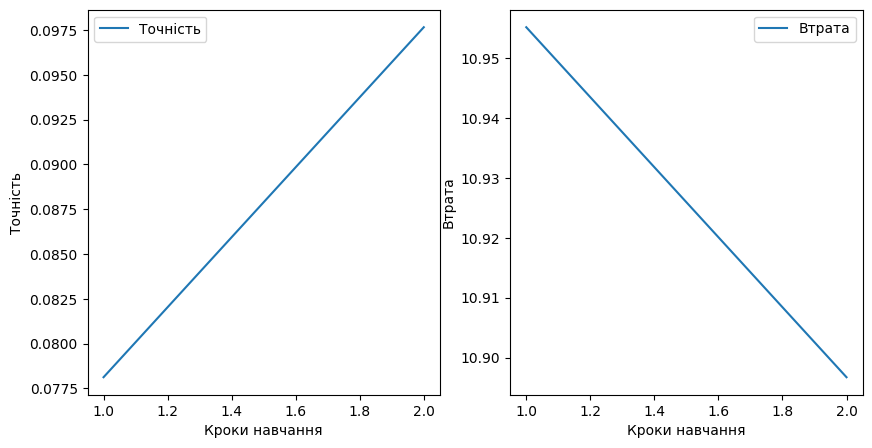

In [380]:
# Виведіть графіки залежності зміни точності і втрат від кроку
# Якщо все зроблено правильно, то точність повинна зростати, а втрати зменшуватись

import matplotlib.pyplot as plt
# Побудова графіків
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, label='Точність')
plt.xlabel('Кроки навчання')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Втрата')
plt.xlabel('Кроки навчання')
plt.ylabel('Втрата')
plt.legend()

plt.show()

In [381]:
# Обчисліть точність навченої нейромережі
# Отримання передбачень для тестового набору даних
y_pred_test = neural_net(x_test)
y_pred_test

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[4.3873970e-05, 3.7377219e-14, 2.3892072e-03, ..., 1.4383019e-03,
        5.0897080e-07, 8.5649788e-01],
       [3.1980799e-05, 1.8368844e-09, 7.1074778e-06, ..., 9.8359483e-01,
        1.1788200e-02, 3.8449145e-03],
       [3.0631229e-01, 1.2187796e-11, 2.5093994e-01, ..., 9.9372694e-05,
        2.8175202e-05, 2.3621256e-02],
       ...,
       [9.8236278e-04, 2.9959975e-14, 7.3430166e-02, ..., 3.7952329e-06,
        4.3647640e-04, 9.2514002e-01],
       [1.5561348e-04, 3.5740081e-14, 2.9341480e-01, ..., 1.0383646e-04,
        1.6891314e-03, 3.7035777e-03],
       [3.5024586e-05, 1.5276122e-12, 1.5208633e-06, ..., 4.7483397e-07,
        9.5072067e-01, 2.9414011e-08]], dtype=float32)>

In [382]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [397]:
y_test = tf.cast(y_test, dtype=tf.int32)  # or tf.int64

# Continue with one-hot encoding
y_test_onehot = tf.one_hot(y_test, depth=num_classes)

# Convert y_pred_test and y_test to float32 if they are not already
y_pred_test = tf.convert_to_tensor(y_pred_test, dtype=tf.float32)
y_test_onehot = tf.convert_to_tensor(y_test_onehot, dtype=tf.float32)

print(f"y_pred_test.shape = {y_pred_test.shape}")
print(f"y_test_onehot.shape = {y_test_onehot.shape}")

y_pred_test.shape = (10000, 10)
y_test_onehot.shape = (10000, 10)


In [411]:
def accuracy2(y_pred, y_true):
    y_pred_class = tf.argmax(y_pred, axis=1)
    y_true = tf.cast(y_true, dtype=tf.int64)  # кастуємо до int64
    y_true_class = tf.argmax(y_true, axis=1)
    correct_predictions = tf.equal(y_pred_class, y_true_class)
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    
# Обчислення точності за допомогою функції accuracy
test_accuracy = accuracy2(y_pred_test, y_test_onehot)
# Обчислення втрат за допомогою функції cross_entropy
print("Точність на тестовому наборі даних:", test_accuracy.numpy())

test_loss = cross_entropy(y_pred_test, y_test_onehot)
print("Втрати на тестовому наборі даних:", test_loss.numpy())

Точність на тестовому наборі даних: 0.1099
Втрати на тестовому наборі даних: 10.548376


In [421]:
y_test_onehot

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [423]:
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)
print("y_test_onehot.shape:", y_test_onehot.shape)

x_test.shape: (10000, 784)
y_test.shape: (10000,)
y_test_onehot.shape: (10000, 10)


In [492]:
y_test_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [493]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [495]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
import random
num_samples = 5

# Виберіть 5 випадкових зображень та їх мітки з тестового набору даних
random_indices = random.sample(range(len(x_test)), num_samples)
print(f"random_indices = {random_indices}")
images_to_test = x_test[random_indices]
#y_test_onehot = y_test_onehot.numpy()
labels_to_test = y_test_onehot[random_indices]

# Перевірка розмірності
print("images_to_test.shape:", images_to_test.shape)
print("labels_to_test.shape:", labels_to_test.shape)

random_indices = [9898, 1423, 8261, 9079, 6676]
images_to_test.shape: (5, 784)
labels_to_test.shape: (5, 10)


In [496]:
labels_to_test.shape

(5, 10)

In [498]:
# Отримайте передбачені значення для цих зображень
predictions = neural_net(images_to_test)
predictions

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.0029915e-07, 4.3923567e-12, 2.0827604e-06, 9.9975044e-01,
        1.1825522e-12, 7.3386571e-13, 2.4480073e-04, 1.9744744e-11,
        2.3401210e-06, 9.3733452e-18],
       [3.4416342e-07, 2.2707929e-09, 3.1302075e-06, 2.5741498e-03,
        3.1340996e-08, 2.9827713e-10, 3.2274607e-01, 2.2505565e-06,
        6.7467403e-01, 1.7461464e-12],
       [7.3481856e-06, 1.8698394e-06, 3.8728043e-10, 9.9920791e-01,
        1.8394672e-10, 4.1726329e-09, 7.8269228e-04, 1.3376264e-07,
        5.8309539e-08, 4.3410881e-16],
       [1.0061629e-05, 4.1021067e-14, 7.9401076e-08, 3.3615013e-08,
        5.9856425e-10, 2.1347849e-07, 9.5794952e-01, 1.4283159e-11,
        4.2040061e-02, 7.7469333e-12],
       [1.9108281e-02, 9.6657932e-06, 5.3772510e-05, 8.4874028e-01,
        1.4452157e-08, 2.8437735e-06, 1.3158710e-01, 7.8889331e-09,
        4.9800402e-04, 1.1220392e-12]], dtype=float32)>

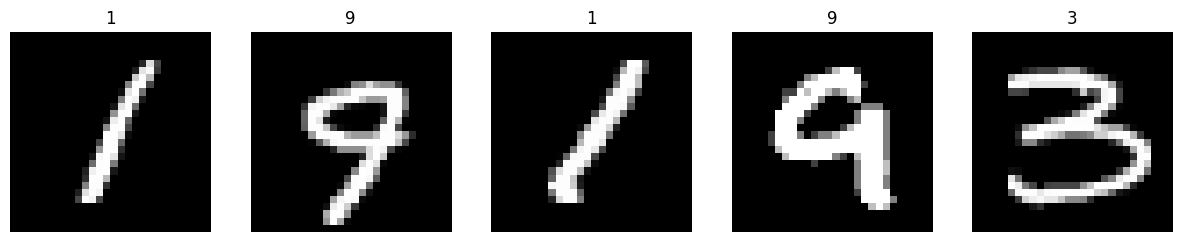

In [506]:
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

# Вибираємо кілька зображень для відображення
num_images = 5

# Перетворення зображення на відповідну форму
images_to_test_reshaped = np.reshape(images_to_test, (-1, 28, 28))

# Виведіть зображення разом з передбаченими мітками
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_to_test_reshaped[i], cmap='gray')
    plt.title(str(tf.argmax(labels_to_test[i]).numpy()))  # Додавання мітки
    plt.axis('off')
plt.show()

передбачення нейромережі відповідає фактичній мітці, то нейромережа правильно класифікувала зображення

In [500]:
predictions.shape

TensorShape([5, 10])

In [507]:
predictions

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.0029915e-07, 4.3923567e-12, 2.0827604e-06, 9.9975044e-01,
        1.1825522e-12, 7.3386571e-13, 2.4480073e-04, 1.9744744e-11,
        2.3401210e-06, 9.3733452e-18],
       [3.4416342e-07, 2.2707929e-09, 3.1302075e-06, 2.5741498e-03,
        3.1340996e-08, 2.9827713e-10, 3.2274607e-01, 2.2505565e-06,
        6.7467403e-01, 1.7461464e-12],
       [7.3481856e-06, 1.8698394e-06, 3.8728043e-10, 9.9920791e-01,
        1.8394672e-10, 4.1726329e-09, 7.8269228e-04, 1.3376264e-07,
        5.8309539e-08, 4.3410881e-16],
       [1.0061629e-05, 4.1021067e-14, 7.9401076e-08, 3.3615013e-08,
        5.9856425e-10, 2.1347849e-07, 9.5794952e-01, 1.4283159e-11,
        4.2040061e-02, 7.7469333e-12],
       [1.9108281e-02, 9.6657932e-06, 5.3772510e-05, 8.4874028e-01,
        1.4452157e-08, 2.8437735e-06, 1.3158710e-01, 7.8889331e-09,
        4.9800402e-04, 1.1220392e-12]], dtype=float32)>

In [508]:
from sklearn.metrics import classification_report

# Отримання передбачень
predicted_labels = np.argmax(predictions, axis=1) 

# Отримання істинних міток
true_labels = np.argmax(labels_to_test, axis=1)

# Виведення метрик якості за допомогою classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           3       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.07      0.20      0.10         5
weighted avg       0.07      0.20      0.10         5



C:\Users\Igor\Vert_1\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Igor\Vert_1\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Igor\Vert_1\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Igor\Vert_1\myenv\Lib\site-packag

In [504]:
# Приклад для LogisticRegression
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Графік важливості функцій
plt.figure(figsize=(10, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

NameError: name 'model' is not defined